# Assignment sheet 3: Numerical Computation and Prinicipal Component Analysis (Deadline: Nov 24, 23:59)

In [1]:
# Set notebook to full width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Computational Issues with Softmax $~$ (3 points)

In the lecture you were introduced to the softmax function which is used to generate probabilities corresponding to the output labels. Typically, the input to the softmax function is a vector of numerical values over the labels and the output is a vector(of same dimension as the input vector) of corresponding probabilities.
**Softmax function is given by,** $~$
$$Softmax(x)_i = \frac{exp(x_i)}{\sum_{j=1}^n exp(x_j)}$$

**Numerical issues might occur when computing softmax functions on a computer which can perform computations
only upto a certain precision.** [Suggested reading $-$ [chapter 4.1 of DeepLearningBook](http://www.deeplearningbook.org/contents/numerical.html)]

$1$. Name these numerical issues and explain them. ($1$ points)

#### Answer

The softmax function might underflow, when the denominator becomes close to 0. E.g. when all the inputs are very negative (division by zero because exp(x) is rounded to 0). It might also overflow, when the inputs are very large and positive.


$2$. Suggest a remedy (with explanation on why it works) to overcome these numerical issues occuring with Softmax computation. Prove that this remedy actually does not change the softmax criteria. Describe a situation where the proposed remedy still fails to remove instability. ($1$ point)

#### Answer

The idea is to substract the same value $\lambda$ of all inputs $x_i (i \in N)$:

$$Softmax(x)_i = \frac{exp(x_i - \lambda)}{\sum_{j=1}^n exp(x_j - \lambda)} = \frac{\frac{exp(x_i)}{exp(\lambda)}}{\sum_{j=1}^n\frac{exp(x_j)}{exp(\lambda)}} = \frac{\frac{1}{exp(\lambda)}exp(x_i)}{\frac{1}{exp(\lambda)}\sum_{j=1}^n exp(x_j)} = \frac{exp(x_i)}{\sum_{j=1}^n exp(x_j)}$$

We can see that this does not change the output of the Softmax function. We now need to choose a value for $\lambda$. The proposed solution is to set $\lambda = \max_j x_j$. The advantage of this is that the maximum element in the vector $\textbf{x}$ becomes 0. Hence, the numerator becomes $exp(0) = 1$ for this case and the denominator $\sum_{j=1}^n exp(x_j) > 1$ because there is at least one $exp(0) = 1$. This way, we can prevent an overflow. Additionally, the denominator becoming $\sum_{j=1}^n exp(x_j) > 1$ also prevents an underflow of the denominator.

However, when the difference between the smallest element of $\textbf{x}$ and the largest element is large, then underflow can still happen when evaluation the numerator of the Softmax function. Then the Softmax function becomes 0 and if someone calculates the log probablity of it, it would again lead to an underflow.

$3$. First write a naive Softmax implementation, in numpy, that can produce numerical instability. Then write a modified Softmax implementation which is numerically stable.  ($0.5 + 0.5 = 1$ points)

In [2]:
import numpy as np

# TODO : Define inputs

def softmax_naive(inputs):
    """Unstable Softmax function"""
    return np.exp(inputs)/np.sum(np.exp(inputs))

def softmax_modified(inputs):
    """Stable Softmax function"""
    return np.exp(inputs - np.max(inputs))/np.sum(np.exp(inputs - np.max(inputs)))


**Points**: 3.0 of 3.0
**Comments**:
- Please present your solution at the blackboard. Thanks!

### Principal Component Analysis $~$ (7 points)

$4$. Is PCA supervised or unsupervised, logically explain your answer. Which is the tunable parameter in PCA?
Briefly explain the role of this parameter in PCA.  ($1+0.5+0.5 = 2$ points)

#### Answer

PCA is an unsupervised learning algorithm because no labeled data is provided. Supervised learning algorithms require labeled data (usually provided by humans). Unsupervised learning algorithms (such as clustering or PCA) on the other hand, try to find patterns and regularities within the data without direct supervision by a human.

The tunable parameter in PCA is the dimension of the decoding matrix $D$. $D$ contains the eigenvectors of the correlation matrix $X^T X$, starting with eigenvector of the largest eigenvalue in magnitude in descending order. Thus, if one wants to compress their data to some dimension $n$, one needs the first $n$ eigenvectors of the $n$ largest eigenvalues in magnitude. Using all the eigenvectors results in the input data and hence no compression.

$5$. Consider the following data:

setA: ${\bf x}^{(1)}$=$(2, 4)^T$, ${\bf x}^{(2)}$=$(2, 2)^T$, ${\bf x}^{(3)}$=$(3, 1)^T$, ${\bf x}^{(4)}$=$(5, 1)^T$ 

setB: ${\bf x}^{(1)}$=$(-1, 1)^T$, ${\bf x}^{(2)}$=$(-2, 2)^T$, ${\bf x}^{(3)}$=$(-1, 3)^T$, ${\bf x}^{(4)}$=$(-1, 4)^T$

$(a)$ Compress the above sets of vectors into a one-dimensional set using PCA, i.e., derive the encoder function $f(x)=D^{T}x$ as defined in the lecture. Then apply f to the datasets inorder to compress them. ($1.5 + 1.5$ points)

#### Answer

setA:

$X = \begin{pmatrix}2 & 4\\2 & 2\\3 & 1\\5 & 1\end{pmatrix}$

Mean substraction:

$X_m = X - \overline{X} = \begin{pmatrix}2 & 4\\2 & 2\\3 & 1\\5 & 1\end{pmatrix} - \begin{pmatrix}3 & 2\\3 & 2\\3 & 2\\3 & 2\end{pmatrix} = \begin{pmatrix}-1 & 2\\-1 & 0\\0 & -1\\2 & -1\end{pmatrix}$

Correlation matrix of the mean subtracted $X_m$:

$X_m^T X_m = \begin{pmatrix}6 & -4\\-4 & 6\end{pmatrix}$

Eigenvalues of correlation matrix:

$\det\left|\lambda I - \begin{pmatrix}6 & -4\\-4 & 6\end{pmatrix}\right| = 0 \Leftrightarrow \lambda_1 = 10, \lambda_2 = 2$

Since, we want to compress the data to 1-D, we only need the eigenvector correspoding to the largest eigenvalue:

$X_m^T X_m \textbf{v} = \lambda \textbf{v} \Leftrightarrow \textbf{v} = \begin{pmatrix}-1\\1\end{pmatrix}$

Thus we have $D = \begin{pmatrix}-1\\1\end{pmatrix}$

We have the following result of the mean-normalized data after encoding with $f(x) = D^T x$:
$$\begin{pmatrix}-1 & 1\end{pmatrix} X_m^T = \begin{pmatrix}3&1&-1&-3\end{pmatrix}$$


setB:

$X = \begin{pmatrix}-1 & 1\\-2 & 2\\-1 & 3\\-1 & 4\end{pmatrix}$

Mean substraction:

$X_m = X - \overline{X} = \begin{pmatrix}-1 & 1\\-2 & 2\\-1 & 3\\-1 & 4\end{pmatrix} - \begin{pmatrix}-1.25 & 2.5\\-1.25 & 2.5\\-1.25 & 2.5\\-1.25 & 2.5\end{pmatrix} = \begin{pmatrix}0.25 & -1.5\\-0.75 & -0.5\\0.25 & 0.5\\0.25 & 1.5\end{pmatrix}$

Correlation matrix of the mean subtracted $X_m$:

$X_m^T X_m = \begin{pmatrix}0.75 & 0.5\\0.5 & 5\end{pmatrix}$

Eigenvalues of correlation matrix:

$\det\left|\lambda I - \begin{pmatrix}0.75 & 0.5\\0.5 & 5\end{pmatrix}\right| = 0 \Leftrightarrow \lambda_1 \approx 5.06, \lambda_2 \approx 0.69$

Since, we want to compress the data to 1-D, we only need the eigenvector correspoding to the largest eigenvalue:

$X_m^T X_m \textbf{v} = \lambda \textbf{v} \Leftrightarrow \textbf{v} \approx \begin{pmatrix}0.12\\0.99\end{pmatrix}$

Thus we have $D \approx \begin{pmatrix}0.12\\0.99\end{pmatrix}$

We have the following result of the mean-normalized data after encoding with $f(x) = D^T x$:
$$\begin{pmatrix}0.12 & 0.99\end{pmatrix} X_m^T \approx \begin{pmatrix}-1.46 & -0.58 & 0.53 & 1.52\end{pmatrix}$$

$(b)$. For both the above sets sketch the corresponding datasets in a separate figure. 
Also include the reconstructed vectors into the corresponding figures. ($2$ points)

#### Answer

setA:

Reconstructed data: $DD^T X_m^T = \begin{pmatrix}-1\\1\end{pmatrix}\begin{pmatrix}3&1&-1&-3\end{pmatrix} = \begin{pmatrix}-3&-1&1&3\\3&1&-1&-3\end{pmatrix}$

setB:

Reconstructed data: $DD^T X_m^T = \begin{pmatrix}0.12\\0.99\end{pmatrix}\begin{pmatrix}-1.46 & -0.58 & 0.53 & 1.52\end{pmatrix} = \begin{pmatrix}-0.17 & -0.07 & 0.06 & 0.18 \\ -1.45 & -0.58 & 0.52 & 1.51\end{pmatrix}$

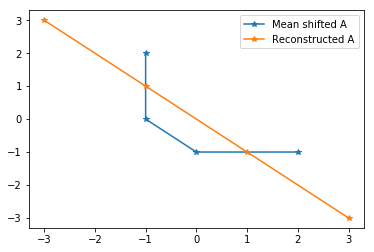

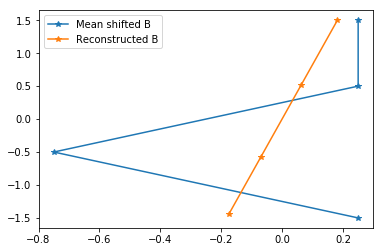

In [3]:
import numpy as np
import matplotlib.pyplot as plt

setA = np.matrix([[-1, 2],[-1, 0],[0, -1],[2, -1]])
setB = np.matrix([[0.25, -1.5],[-0.75,-0.5],[0.25, 0.5],[0.25, 1.5]])

D_A = np.matrix([-1,1]).T
D_B = np.matrix([0.12,0.99]).T

setARe = D_A * D_A.T * setA.T
setBRe = D_B * D_B.T * setB.T

plt.plot(np.array(setA[:,0]),np.array(setA[:,1]),'-*')
plt.plot(np.array(setARe.T[:,0]),np.array(setARe.T[:,1]),'-*')
plt.legend(['Mean shifted A', 'Reconstructed A'])
plt.show()
plt.plot(np.array(setB[:,0]),np.array(setB[:,1]),'-*')
plt.plot(np.array(setBRe.T[:,0]),np.array(setBRe.T[:,1]),'-*')
plt.legend(['Mean shifted B', 'Reconstructed B'])
plt.show()

**Points**: 6.0 of 7.0
**Comments**:
- Your reconstruction of set A is not correct. 

### Gradient descent and Newton's method $~$ (5 points)

**Suppose $f(x) = 2x^3 - 5x + 6$ **

$6$. Write down the mathematical expressions for minimizing f(x) using Gradient descent(GD) and then using Newton's Method(NM). ($1$ points)

#### Answer

Gradient descent:

$x_{i+1} = x_i - \epsilon \frac{\partial f(x)}{\partial x} = x_i - \epsilon (6x^2 - 5)$

Newton's Method:

$x = x^{(0)} - \frac{f'(x^{(0)})}{f''(x^{(0)})} = x^{(0)} - \frac{6(x^{(0)})^2 - 5}{12 x^{(0)}}$

$7$. Report the updated values of x, both for GD and NM, at $x = 0$. what do you observe? ($1$ points)

Gradient descent:

$x_{i+1} = 0 - \epsilon (0 - 5) = 5 \epsilon$

Newton's Method:

$x = 0 - \frac{-5}{0} = \frac{5}{0} = \infty$

With Newton's Method, we run into an error because we devide by zero.

**Points**: 2.0 of 2.0
**Comments**:
- None

$8$. Perform GD and NM for the above function using Tensorflow. ($1.5 + 1.5$ points)

In [4]:
import numpy as np
import tensorflow as tf

x = tf.Variable([2], dtype=tf.float32)
model = 2 * x**3 - 5 * x + 6

num_itr = 20

eps = 0.05
optimizer = tf.train.GradientDescentOptimizer(eps)

train = optimizer.minimize(model)

init = tf.global_variables_initializer()
sess = tf.Session()

sess.run(init)
sess.run(model)
for i in range(num_itr):  
    sess.run(train)
    print("step", i+1, "x:", sess.run(x), "function:", sess.run(model))


step 1 x: [ 1.04999995] function: [ 3.06524968]
step 2 x: [ 0.96925002] function: [ 2.97486544]
step 3 x: [ 0.93741632] function: [ 2.96042657]
step 4 x: [ 0.92379153] function: [ 2.9577527]
step 5 x: [ 0.91777426] function: [ 2.95722866]
step 6 x: [ 0.91508138] function: [ 2.95712352]
step 7 x: [ 0.9138692] function: [ 2.9571023]
step 8 x: [ 0.91332215] function: [ 2.95709801]
step 9 x: [ 0.91307497] function: [ 2.95709705]
step 10 x: [ 0.91296321] function: [ 2.95709705]
step 11 x: [ 0.91291267] function: [ 2.95709705]
step 12 x: [ 0.91288978] function: [ 2.95709705]
step 13 x: [ 0.91287947] function: [ 2.95709705]
step 14 x: [ 0.91287482] function: [ 2.95709705]
step 15 x: [ 0.91287267] function: [ 2.95709682]
step 16 x: [ 0.91287172] function: [ 2.95709682]
step 17 x: [ 0.9128713] function: [ 2.95709705]
step 18 x: [ 0.91287106] function: [ 2.95709682]
step 19 x: [ 0.912871] function: [ 2.95709705]
step 20 x: [ 0.91287094] function: [ 2.95709658]


In [5]:
import numpy as np
import tensorflow as tf

num_itr = 20

x = tf.Variable([2], dtype=tf.float32)
model = 2 * x**3 - 5 * x + 6

x_grad = tf.gradients(model, x)
x_hess = tf.gradients(x_grad, x)

newton = x - tf.div(x_grad, x_hess)

init = tf.global_variables_initializer()
sess = tf.Session()

sess.run(init)

for step in range(0, num_itr):
    print ("step:",step, "x: ", sess.run(x), " f(x): ", sess.run(model))
    sess.run(tf.assign(x,sess.run(newton[0])))

step: 0 x:  [ 2.]  f(x):  [ 12.]
step: 1 x:  [ 1.20833325]  f(x):  [ 3.48683453]
step: 2 x:  [ 0.94899416]  f(x):  [ 2.9643383]
step: 3 x:  [ 0.91355842]  f(x):  [ 2.95709968]
step: 4 x:  [ 0.91287118]  f(x):  [ 2.95709705]
step: 5 x:  [ 0.91287094]  f(x):  [ 2.95709658]
step: 6 x:  [ 0.91287094]  f(x):  [ 2.95709658]
step: 7 x:  [ 0.91287094]  f(x):  [ 2.95709658]
step: 8 x:  [ 0.91287094]  f(x):  [ 2.95709658]
step: 9 x:  [ 0.91287094]  f(x):  [ 2.95709658]
step: 10 x:  [ 0.91287094]  f(x):  [ 2.95709658]
step: 11 x:  [ 0.91287094]  f(x):  [ 2.95709658]
step: 12 x:  [ 0.91287094]  f(x):  [ 2.95709658]
step: 13 x:  [ 0.91287094]  f(x):  [ 2.95709658]
step: 14 x:  [ 0.91287094]  f(x):  [ 2.95709658]
step: 15 x:  [ 0.91287094]  f(x):  [ 2.95709658]
step: 16 x:  [ 0.91287094]  f(x):  [ 2.95709658]
step: 17 x:  [ 0.91287094]  f(x):  [ 2.95709658]
step: 18 x:  [ 0.91287094]  f(x):  [ 2.95709658]
step: 19 x:  [ 0.91287094]  f(x):  [ 2.95709658]


**Points**: 2.0 of 3.0
**Comments**:
- You should implement the gradient descent update rule by hand instead of using a predefined optimizer.

### Gradient descent computation and visualisation $~$ (3 + 2 points)

#### Now visualize the Gradient Descent algorithm to fit a straight line to data generated using  $y = \theta_{true}x$ $~$, i.e., use this expression to first produce the data (see code below the lines starting with m=20 and following) and then try to fit a straight line to this data. Fitting a straight line means that you have to approximate this $\theta_{true}$ parameter using the hypothesis or predictive model by minimizing the cost function defined below.

**For this task you should minimize a cost function of the form:**
$$\frac{1}{2m}\sum_{i=1}^m [h_{\theta}(x^i)-y^i]^2$$
where
- $x^i$ is the $i^{th}$ input 

- $y^i$ is the true $i^{th}$ response or output

- $h_{\theta}(x)$ is the hypothesis or predictive model

#### Assume $~$ $h_{\theta}(x) = \theta x$ $~$ to be the hypothesis or predictive model

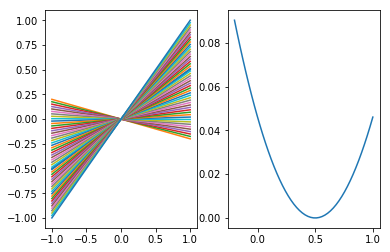

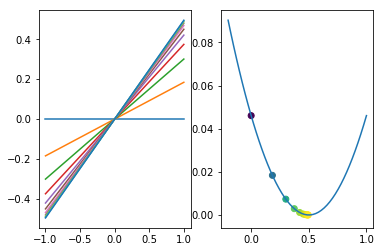

In [6]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Generate the true data which is to be fitted
m = 20                      # number of data points for x
theta_true = 0.5            # corresponds to the true slope
x = np.linspace(-1,1,m)     # x values or inputs
y = theta_true * x          # True response


# Create a subplot window
# On the left window plot the true data and the approximation 
# that you obtain with different estimates of the slope theta_true
# and on the right window plot the cost function 

# TODO : Create the subplot window

def hypothesis(x, theta):
    """Our "hypothesis or predictive model", a straight line through the origin."""
    return np.dot(np.matrix(theta).T, np.matrix(x))

def cost_func(theta):
    """The cost function describing the goodness of fit."""  
    return 1.0/(2.0 * m) * np.sum((np.square(hypothesis(x, theta) - y)), 1)

# First construct a grid of theta parameter and their corresponding
# cost function values.
theta_grid = np.linspace(-0.2,1,50)

# Find the cost function values to be stored in J_grid
# TODO : Create J_grid
J_grid = cost_func(theta_grid)

# Plot the cost function as a function of theta.
# TODO : Do the plot

plt.subplot(121)
plt.plot(x, y)
plt.plot(x, hypothesis(x, theta_grid).T)
plt.subplot(122)
plt.plot(theta_grid, J_grid)
plt.show()


# Take N steps with learning rate alpha down the steepest gradient,
# starting at theta = 0.
N = 10

alpha = 1 
# this is just a starting value of alpha, 
# you must consider different values of alpha (try using large values)
# and redo the steps below to generate different plots
theta = [0]


# TODO :Compute the N steps down the steepest gradient
for i in range(N):
    theta.append(theta[i] - alpha * sum((theta[i] * x - y)/m * x))

# TODO : Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the left window of the subplot in a matching colour.

plt.subplot(121)
plt.plot(x, hypothesis(x, theta).T)
plt.subplot(122)
plt.plot(theta_grid, J_grid)
plt.scatter(np.array(theta), np.array(cost_func(theta)).reshape(-1), c=theta)
plt.show()

# TODO : Put the labels, titles and a legend.

**Points**: 3.0 of 3.0
**Comments**:
- None

#### Now assume that the data is generated using  $y = \theta_1x + \theta_0$
** Following the same logic you applied for the above task define a predictive model 
and perform 5 steps of gradient descent with learning rate alpha = 0.7 **

In [7]:
# Generate the true data which is to be fitted
m = 20
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

# Create the sub-plot: left window is the data, right window will be the cost function.
# TODO


def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    return np.dot(np.matrix(theta1).T, np.matrix(x)) +  np.matrix(theta0).T

def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    return 1.0/(2.0 * m) * np.sum((np.square(hypothesis(x, theta0, theta1) - y)), 1)


# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(-1,4,101)
theta1_grid = np.linspace(-5,5,101)

# TODO : Compute the cost function values

J_grid = cost_func(theta0_grid, theta1_grid)
X, Y = np.meshgrid(theta0_grid, theta1_grid)

plt.contour(X, Y, J_grid)
plt.show()


# TODO : Do a labeled contour plot for the cost function on right window of the above subplot


# TODO : Take 5 steps with learning rate alpha = 0.7 down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).


# TODO : Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the left window in a matching colour.


# TODO : Add the labels, titles and a legend to the plot.

TypeError: Shape of x does not match that of z: found (101, 101) instead of (101, 1).

**Points**: 0.0 of 2.0
**Comments**:
- Your code produced an error.

### Linear Algebra Bonus
- [Additional material - Linear Algebra Basics](http://www.cs.ubc.ca/~schmidtm/Documents/2009_Notes_LinearAlgebra.pdf)

#### Trace of a Matrix $~$ (3 points)
- [Reading material on Trace](https://en.wikipedia.org/wiki/Trace_(linear_algebra)

Prove that the trace of a ***symmetric positive definite*** matrix is the sum of its eigenvalues.    ($0.5$ points)

##### Answer
$ tr(A) = \sum_{i=1}^n a_{ii} $  A positive definite matrix has positive diagonal entries and thus trace is positive. $ \implies a_{ii}>0 \; \forall i\in [1,n] $

The eigen-decomposition of $ A = V\Lambda V^T$ where V is orthonormal $\implies V^{-1} = V^T $ and $ ||v_i||_2^2 = 1 $

$\implies A = \begin{bmatrix}
\Sigma_{i=1}^{n}\lambda_i v_{1i}^2 &\Sigma_{i=1}^{n}\lambda_i v_{1i} v_{2i} &\cdots &\Sigma_{i=1}^{n}\lambda_i v_{1i} v_{ni} \\
\Sigma_{i=1}^{n}\lambda_i v_{2i} v_{1i} &\Sigma_{i=1}^{n}\lambda_i v_{2i}^2 &\cdots &\Sigma_{i=1}^{n}\lambda_i v_{2i} v_{ni} \\
\vdots & \vdots & \ddots & \vdots\\
\Sigma_{i=1}^{n}\lambda_i v_{ni} v_{1i} &\Sigma_{i=1}^{n}\lambda_i v_{ni} v_{2i} &\cdots &\Sigma_{i=1}^{n}\lambda_i v_{ni}^2
\end{bmatrix}$ and $tr(A) = \Sigma_{j=1}^{n}(\lambda_j \Sigma_{i=1}^nv_{ij}^2) \implies \Sigma_{j=1}^n \lambda_j||v_j||_2^2 \implies $ $\Sigma_{j=1}^n \lambda_j\ $

Suppose $\mathbf{Y}$ is a $n \times m$ matrix with $m \leq n$ and has ***full rank***, then

$(a)$.   Give the rank of $\mathbf{Y}$.                                                                 ($0.5$ points)

Since $\mathbf{Y}$ has full rank, the rank should be $m$

$(b)$.  Show that trace of $\mathbf{Y}^{T}(\mathbf{Y}^T\mathbf{Y})^{-1}\mathbf{Y}$ = rank($\mathbf{Y}$)                                     ($1$ points)

Using the property of trace, $tr(AB) = tr(BA) \implies tr(\mathbf{Y}[(\mathbf{Y}^T\mathbf{Y})^{-1}\mathbf{Y}^{T}]) \implies tr((\mathbf{Y}^T\mathbf{Y})^{-1}[\mathbf{Y}^{T}\mathbf{Y}]) \implies tr(\mathbf{I}_{mxm}) \implies m $ which is the rank of $\mathbf{Y}$

$(c)$. Prove that $\mathbf{Y}^{T}(\mathbf{Y}^T\mathbf{Y})^{-1}\mathbf{Y}$ is the projection matrix w.r.t space defined by $\mathbf{Y}$.     ($1$ points)

$ (\mathbf{Y}(\mathbf{Y}^T\mathbf{Y})^{-1}\mathbf{Y}^{T}) (\mathbf{Y}(\mathbf{Y}^T\mathbf{Y})^{-1}\mathbf{Y}^{T}) \implies \mathbf{Y}(\mathbf{Y}^T\mathbf{Y})^{-1}[\mathbf{Y}^{T}\mathbf{Y}](\mathbf{Y}^T\mathbf{Y})^{-1}\mathbf{Y}^{T} \implies \mathbf{Y}(\mathbf{Y}^T\mathbf{Y})^{-1}\underbrace{\mathbf{Y}^{T}\mathbf{Y}(\mathbf{Y}^T\mathbf{Y})^{-1}}_\text{I}\mathbf{Y}^{T} \implies \mathbf{Y}(\mathbf{Y}^T\mathbf{Y})^{-1}\mathbf{Y}^{T} $

Thus, it is a projection matrix w.r.t space defined by $\mathbf{Y}$

**Points**: 3.0 of 3.0
**Comments**:
- Please present your solution at the blackboard. Thanks!
- You get full points here but there is an issue with your proof for $b)$. The problem was however, that there was a typo in to exercise. $\mathbf{Y}$ should have been defined as follows:
$\mathbf{Y}$ is a $m \times n$ matrix with $n \leq m$. 

#### Jacobian $~$ (3 points)

***[Reading material on Jacobian](https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant)***

Show that the Jacobian determinant of $\frac{\partial(fg, h)}{\partial(u, v)}$ is equal to $\frac{\partial(f, h)}{\partial(u, v)}g + f\frac{\partial(g, h)}{\partial(u, v)}$,

where $f$,$g$, and $h$ are functions of $u$ and $v$ (i.e., $f(u,v)$, $g(u,v)$, and $h(u,v)$)   ($3$ points)

Hint: Use the property $\frac{\partial(y, x)}{\partial(u, v)} = \frac{\partial(y)}{\partial(u)}\frac{\partial(x)}{\partial(v)}-\frac{\partial(y)}{\partial(v)}\frac{\partial(x)}{\partial(u)}$

$\frac{\partial(fg, h)}{\partial(u, v)} = \frac{\partial(fg)}{\partial(u)}\frac{\partial(h)}{\partial(v)}-\frac{\partial(fg)}{\partial(v)}\frac{\partial(h)}{\partial(u)} \implies (f\frac{\partial(g)}{\partial(u)} + g\frac{\partial(f)}{\partial(u)})\frac{\partial(h)}{\partial(v)} - (f\frac{\partial(g)}{\partial(v)} + g\frac{\partial(f)}{\partial(v)})\frac{\partial(h)}{\partial(u)} \implies g(\frac{\partial(f)}{\partial(u)}\frac{\partial(h)}{\partial(v)} - \frac{\partial(f)}{\partial(v)}\frac{\partial(h)}{\partial(u)}) + f(\frac{\partial(g)}{\partial(u)}\frac{\partial(h)}{\partial(v)} - \frac{\partial(g)}{\partial(v)}\frac{\partial(h)}{\partial(u)}) \implies g\frac{\partial(f, h)}{\partial(u, v)} + f\frac{\partial(g, h)}{\partial(u, v)} $

**Points**: 3.0 of 3.0
**Comments**:
- Thanks for presenting your solution in the tutorial. Of course you get full points. The issue was that *jupyter lab* did cut off the right most part of your solution. That's why I was not able to follow your proof. 

#### Hessian $~$ (2 points)
***[Reading material on Hessian](https://en.wikipedia.org/wiki/Hessian_matrix)***

Let $\mathbf{M}=\left[\begin{array}{cccc}
   5 & 1 & 0 & 1\\
   1 & 4 & 1 & 0\\
   0 & 1 & 3 & 1\\
   1 & 0 & 1 & 2\\
  \end{array}\right]$
  
denote the Hessian matrix at particular point for a particular function.

$(a)$. What properties of the functional can you infer from the above information.(give mathematical reasons) ($1$ point)

$\mathbf{M}$ is positive semi-definite since it is

strictly diagonally dominant i.e. $m_{ii} \geq \Sigma_{i=1, i\neq j}^n m_{ij} $, 

symmetric $\mathbf{M} = \mathbf{M}^T$, 

positive diagonals $m_{ii} > 0$

Thus, it is convex at the particular point.

$(b)$. Provide a generic mathematical representation (e.g. the generic representation of a straight line is $ax+by+c=0$) for the above function. ($1$ point)

**Points**: 1.0 of 2.0
**Comments**:
- None

## Grading: 16.0 of 20.0 points + 7.0 bonus points. Well done.